# Taller 5 - Morfología matemática

# Punto 6 - Esqueleto y adelgazamiento de una imagen

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

## 6.0 Inicialización.

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure
from skimage.morphology import skeletonize, thin



### 6.1 Cargado y visualización de la imagen.

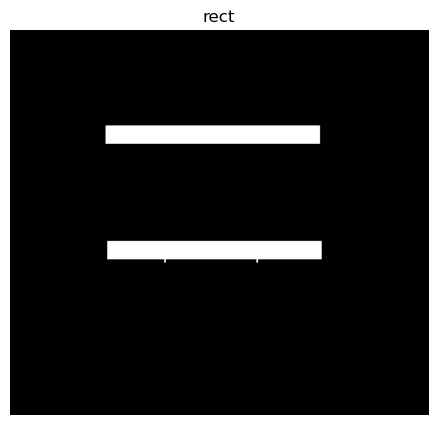

In [ ]:
ruta_rect = './images/rect.png'
img_rect = cv2.imread(ruta_rect, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_rect, cmap='gray', vmin=0, vmax=255)
ax.set_title('rect')
ax.axis('off')
plt.show()

### 6.2 Esqueletización de la imagen.



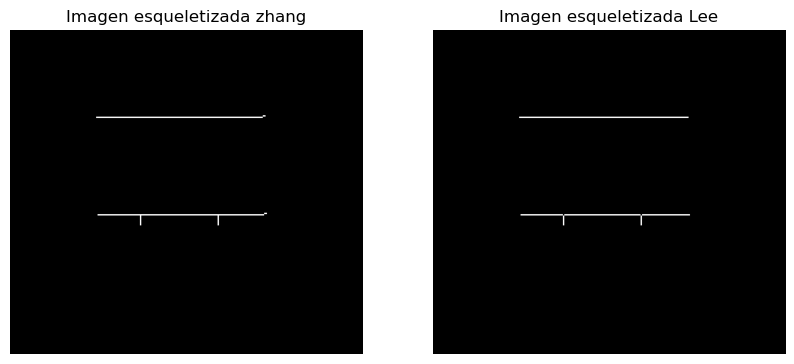

In [ ]:
sk_image_zhang = skeletonize(img_rect, method='zhang')
sk_image_zhang = exposure.rescale_intensity(sk_image_zhang, in_range=(np.min(sk_image_zhang), np.max(sk_image_zhang)), out_range=(0, 255)).astype(np.uint8)

sk_image_lee = skeletonize(img_rect, method='lee')
sk_image_lee = exposure.rescale_intensity(sk_image_lee, in_range=(np.min(sk_image_lee), np.max(sk_image_lee)), out_range=(0, 255)).astype(np.uint8)


fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sk_image_zhang, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Imagen esqueletizada zhang')
ax[0].axis('off')

ax[1].imshow(sk_image_lee, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Imagen esqueletizada Lee')
ax[1].axis('off')
plt.show()

**Funcionamiento de ambos algoritmos**


El método Zhang elimina píxeles de los bordes de forma iterativa, asegurando que la estructura del objeto se mantenga conectada, pero suele dejar pequeños apéndices en los bordes. En cambio, el método Lee también adelgaza la imagen de manera iterativa, pero tiende a generar un esqueleto más limpio, aunque con el riesgo de crear huecos en algunas partes.

### 6.3 Adelgazamiento de la imagen original.

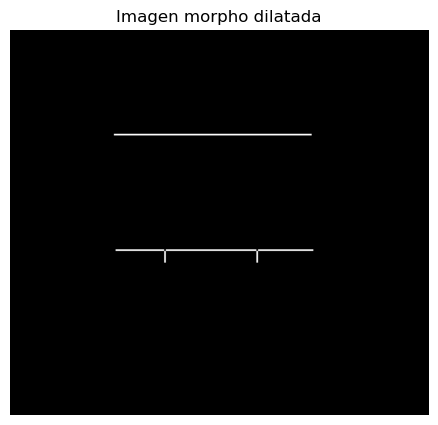

In [ ]:
th_img_rect  = thin(img_rect)
th_img_rect = exposure.rescale_intensity(th_img_rect, in_range=(np.min(th_img_rect), np.max(th_img_rect)), out_range=(0, 255)).astype(np.uint8)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(th_img_rect, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen esqueletizada thin')
ax.axis('off')
plt.show()

**Comparación de resultados**



El adelgazamiento suaviza los bordes de los objetos sin reducirlos a un esqueleto delgado como en la esqueletización. En comparación, la esqueletización reduce las formas a una versión mínima de una sola línea de ancho, mientras que el adelgazamiento reduce pero dejando un poco de linea.

### 6.4 Cargado y visualización de la imagen.

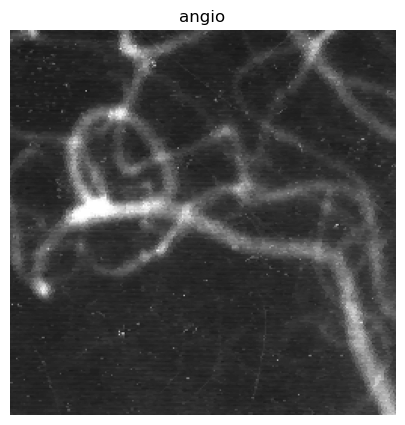

In [ ]:
ruta_angio = './images/angio.png'
img_angio = cv2.imread(ruta_angio, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_angio, cmap='gray', vmin=0, vmax=255)
ax.set_title('angio')
ax.axis('off')
plt.show()

### 6.5 Umbralización de la imagen, utilizando el algoritmo OTSU, y filtrado por medio de un cierre y apertura de imagen, con mascara en cruz de 3x3. 

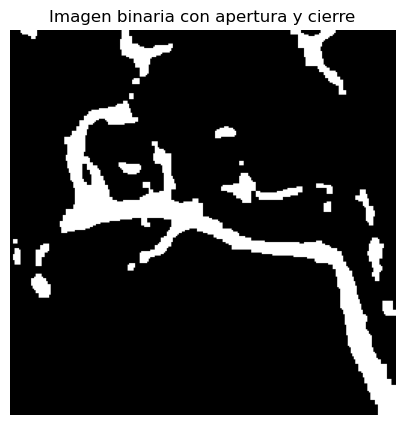

In [30]:
img_angio_bin = cv2.threshold(img_angio, 60, 255, cv2.THRESH_OTSU)[1]

def create_cross_mask(size):
    mask = np.full((size, size), np.nan)
    center = size // 2
    mask[center, :] = 1
    mask[:, center] = 1
    return mask

cross_mask = create_cross_mask(3)

opening_image = opening(img_angio_bin, footprint=cross_mask)
closing_image = closing(opening_image, footprint=cross_mask)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(closing_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen binaria con apertura y cierre')
ax.axis('off')
plt.show()

### 6.6 Esqueletización y adelgazamiento

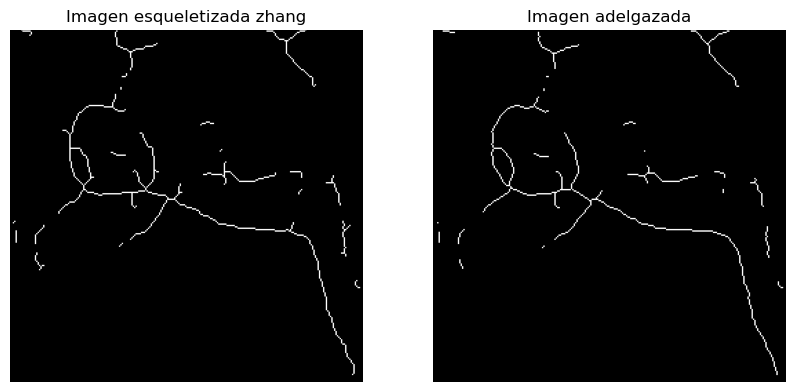

In [31]:
sk_image_zhang = skeletonize(closing_image, method='zhang')
sk_image_zhang = exposure.rescale_intensity(sk_image_zhang, in_range=(np.min(sk_image_zhang), np.max(sk_image_zhang)), out_range=(0, 255)).astype(np.uint8)

image_thin = thin(closing_image)
image_thin = exposure.rescale_intensity(image_thin, in_range=(np.min(image_thin), np.max(image_thin)), out_range=(0, 255)).astype(np.uint8)


fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sk_image_zhang, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Imagen esqueletizada zhang')
ax[0].axis('off')

ax[1].imshow(image_thin, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Imagen adelgazada')
ax[1].axis('off')
plt.show()

La esqueletización y el adelgazamiento generan resultados similares, pero la esqueletización conserva mejor las pequeñas ramificaciones de los objetos, manteniendo detalles que pueden perderse con el adelgazamiento. Aun así, la diferencia entre ambas técnicas no es demasiado marcada en este caso.

### 6.7 Sobreponga la imagen adelgazada a la imagen angio.png

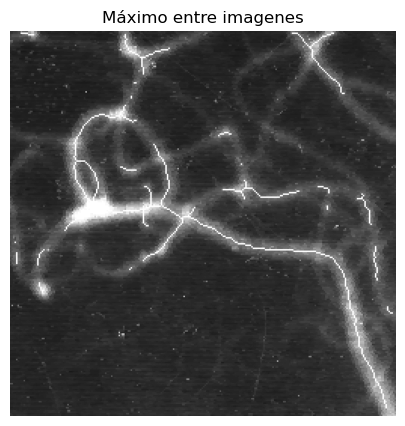

In [32]:
max_image = np.maximum(image_thin, img_angio)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(max_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Máximo entre imagenes')
ax.axis('off')
plt.show()

Al superponer la imagen adelgazada con la imagen original, se logra resaltar los elementos lineales más notorios, facilitando la identificación de las áreas con mayor contraste. Sin embargo, algunas partes que podrían ser relevantes no se destacan completamente. Sería ideal que la mayoría de los caminos estuvieran mejor conectados para una representación más coherente de la estructura.